In [69]:
# Import library
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import pickle

# Cleansing Data Result Analysis

In [3]:
# Read data
df = pd.read_csv(
    "csv_data/clean_data.csv",
    sep="\t",
)
df = df.drop('Unnamed: 0', axis=1)
df

,kalimat,sentiment,clean text,clean abusive,clean alay,clean abusive alay
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis di jalan sumatra bandung temp...,lokasi strategis di jalan sumatra bandung temp...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...,duh jadi mahasiswa jangan sombong dong kasih k...,aduh jadi mahasiswa jangan sombong dong kasih ...,aduh jadi mahasiswa jangan sombong dong kasih ...
...,...,...,...,...,...,...
10995,tidak kecewa,positive,tidak kecewa,tidak kecewa,tidak kecewa,tidak kecewa
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak rasa masakan nya apalagi kepiting yang me...,enak rasa masakan nya apalagi kepiting yang me...,enak rasa masakan nya apalagi kepiting yang me...,enak rasa masakan nya apalagi kepiting yang me...
10997,hormati partai-partai yang telah berkoalisi,neutral,hormati partai partai yang telah berkoalisi,hormati partai partai yang telah berkoalisi,hormati partai partai yang telah berkoalisi,hormati partai partai yang telah berkoalisi
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi di tol pasteur sudah macet parah bik...,pagi pagi di tol pasteur sudah macet parah bik...,pagi pagi di tol pasteur sudah macet parah bik...,pagi pagi di tol pasteur sudah macet parah bik...


## Value Count of Each Sentiment

In [4]:
# Count value of each sentiment
df['sentiment'].value_counts()

sentiment
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

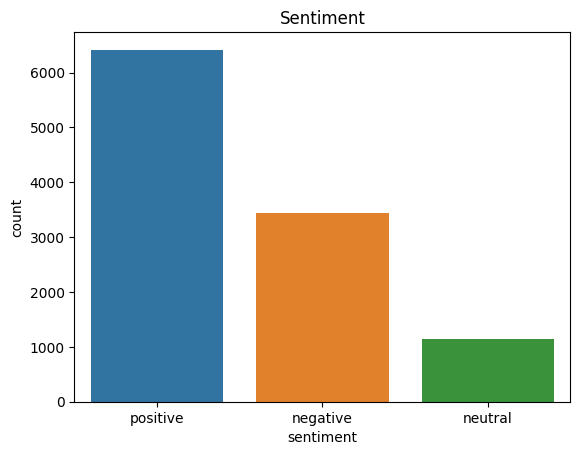

In [5]:
sns.barplot(y=df['sentiment'].value_counts(), x=df['sentiment'].value_counts().index).set_title('Sentiment')
plt.show()

## Mean, Median, Mode

In [6]:
df['num_kata'] = df['clean text'].str.split().str.len()
df.head()

,kalimat,sentiment,clean text,clean abusive,clean alay,clean abusive alay,num_kata
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,56
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,18
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis di jalan sumatra bandung temp...,lokasi strategis di jalan sumatra bandung temp...,29
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,15
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...,duh jadi mahasiswa jangan sombong dong kasih k...,aduh jadi mahasiswa jangan sombong dong kasih ...,aduh jadi mahasiswa jangan sombong dong kasih ...,32


In [7]:
# Total jumlah karakter dari 1 data
total_kata = df['num_kata'].sum()
print(f"Total jumlah kata dari dataset sebanyak: {total_kata:,} kata")

Total jumlah kata dari dataset sebanyak: 322,219 kata


In [8]:
# rata-rata jumlah kata dalam teks di dataset
avg_num_kata = df['num_kata'].mean()
print(f"Rata-rata jumlah kata dalam kata di dataset: {avg_num_kata:.3f} kata")

Rata-rata jumlah kata dalam kata di dataset: 29.293 kata


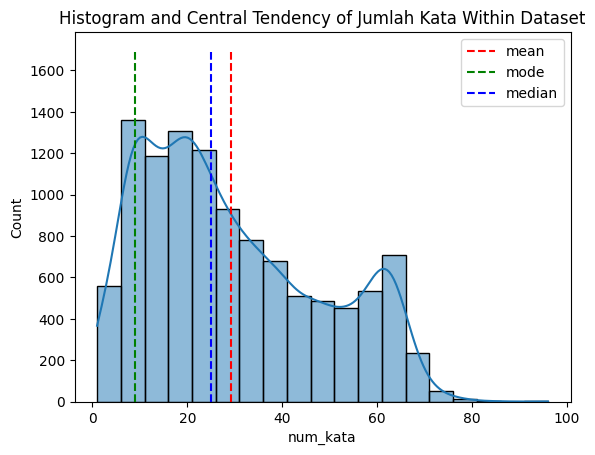

In [9]:
# Memplot histogram jumlah kata pada teks
sns.histplot(data=df, x='num_kata', binwidth=5, kde=True)
plt.vlines(df['num_kata'].mean(), 0, 1700, label='mean', linestyle='dashed', color='red')
plt.vlines(df['num_kata'].mode(), 0, 1700, label='mode', linestyle='dashed', color='green')
plt.vlines(df['num_kata'].median(), 0, 1700, label='median', linestyle='dashed', color='blue')
plt.title("Histogram and Central Tendency of Jumlah Kata Within Dataset")
plt.legend()
plt.show()

### Positive Sentiment

In [12]:
df_positive = df.loc[df['sentiment'] == 'positive']
df_positive

,kalimat,sentiment,clean text,clean abusive,clean alay,clean abusive alay,num_kata
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,56
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis di jalan sumatera bandung tem...,lokasi strategis di jalan sumatra bandung temp...,lokasi strategis di jalan sumatra bandung temp...,29
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,15
5,"makanan beragam , harga makanan di food stall ...",positive,makanan beragam harga makanan di food stall ak...,makanan beragam harga makanan di food stall ak...,makanan beragam harga makanan di food stall ak...,makanan beragam harga makanan di food stall ak...,24
7,"tempat unik , bagus buat foto , makanan enak ,...",positive,tempat unik bagus buat foto makanan enak pegaw...,tempat unik bagus buat foto makanan enak pegaw...,tempat unik bagus buat foto makanan enak pegaw...,tempat unik bagus buat foto makanan enak pegaw...,34
...,...,...,...,...,...,...,...
10992,kalau memang jala nya sudah begitu terima saja...,positive,kalau memang jala nya sudah begitu terima saja...,kalau memang jala nya sudah begitu terima saja...,kalau memang jala nya sudah begitu terima saja...,kalau memang jala nya sudah begitu terima saja...,10
10994,tidak bosan,positive,tidak bosan,tidak bosan,tidak bosan,tidak bosan,2
10995,tidak kecewa,positive,tidak kecewa,tidak kecewa,tidak kecewa,tidak kecewa,2
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak rasa masakan nya apalagi kepiting yang me...,enak rasa masakan nya apalagi kepiting yang me...,enak rasa masakan nya apalagi kepiting yang me...,enak rasa masakan nya apalagi kepiting yang me...,24


In [13]:
# Total jumlah karakter dari positive sentiment data
total_kata = df_positive['num_kata'].sum()
print(f"Total jumlah kata dari dataset dengans sentimen positif sebanyak: {total_kata:,} kata")

Total jumlah kata dari dataset dengans sentimen positif sebanyak: 233,870 kata


In [14]:
# rata-rata jumlah kata dalam teks di dataset
avg_num_kata = df_positive['num_kata'].mean()
print(f"Rata-rata jumlah kata dalam kata di dataset: {avg_num_kata:.3f} kata")

Rata-rata jumlah kata dalam kata di dataset: 36.451 kata


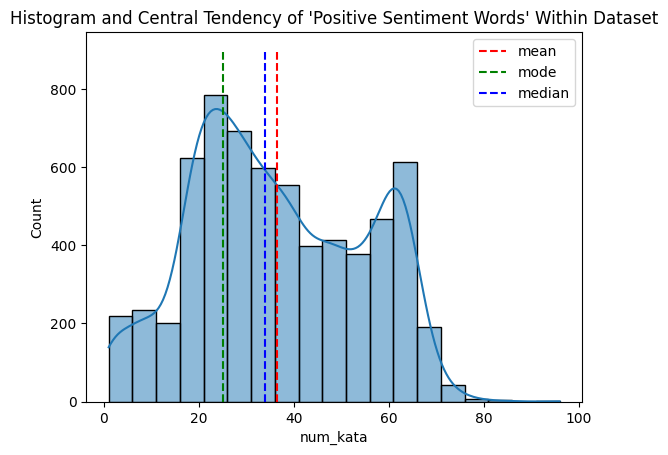

In [15]:
# Memplot histogram jumlah kata pada teks
sns.histplot(data=df_positive, x='num_kata', binwidth=5, kde=True)
plt.vlines(df_positive['num_kata'].mean(), 0, 900, label='mean', linestyle='dashed', color='red')
plt.vlines(df_positive['num_kata'].mode(), 0, 900, label='mode', linestyle='dashed', color='green')
plt.vlines(df_positive['num_kata'].median(), 0, 900, label='median', linestyle='dashed', color='blue')
plt.title("Histogram and Central Tendency of 'Positive Sentiment Words' Within Dataset")
plt.legend()
plt.show()

### Negative Sentiment

In [16]:
df_negative = df.loc[df['sentiment'] == 'negative']
df_negative

,kalimat,sentiment,clean text,clean abusive,clean alay,clean abusive alay,num_kata
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...,duh jadi mahasiswa jangan sombong dong kasih k...,aduh jadi mahasiswa jangan sombong dong kasih ...,aduh jadi mahasiswa jangan sombong dong kasih ...,32
6,pakai kartu kredit bca tidak untung malah rugi...,negative,pakai kartu kredit bca tidak untung malah rugi...,pakai kartu kredit bca tidak untung malah rugi...,pakai kartu kredit baca tidak untung malah rug...,pakai kartu kredit baca tidak untung malah rug...,9
10,simcard indosat inaktiv gara-gara lupa isi pul...,negative,simcard indosat inaktiv gara gara lupa isi pul...,simcard indosat inaktiv gara gara lupa isi pul...,simcard indosat inaktiv gara gara lupa isi pul...,simcard indosat inaktiv gara gara lupa isi pul...,19
11,sifat iri sering muncul pada orang orang yang ...,negative,sifat iri sering muncul pada orang orang yang ...,sifat iri sering muncul pada orang orang yang ...,sifat iri sering muncul pada orang orang yang ...,sifat iri sering muncul pada orang orang yang ...,12
13,"pengalaman bersama indosat hari ini , semoga t...",negative,pengalaman bersama indosat hari ini semoga tid...,pengalaman bersama indosat hari ini semoga tid...,pengalaman bersama indosat hari ini semoga tid...,pengalaman bersama indosat hari ini semoga tid...,19
...,...,...,...,...,...,...,...
10982,tolong dibaca pesan saya ! di dalam kotak hand...,negative,tolong dibaca pesan saya di dalam kotak handph...,tolong dibaca pesan saya di dalam kotak handph...,tolong dibaca pesan saya di dalam kotak handph...,tolong dibaca pesan saya di dalam kotak handph...,16
10985,"sumpah gue kecewa banget dengan sms , cuma tea...",negative,sumpah gue kecewa banget dengan sms cuma tease...,sumpah gue kecewa banget dengan sms cuma tease...,sumpah gue kecewa banget dengan sms cuma tease...,sumpah gue kecewa banget dengan sms cuma tease...,21
10989,tadinya pengin mengantar teman dari kalau ke r...,negative,tadinya pengin mengantar teman dari kalau ke r...,tadinya pengin mengantar teman dari kalau ke r...,tadinya ingin mengantar teman dari kalau ke re...,tadinya ingin mengantar teman dari kalau ke re...,42
10991,dapat rom awal abad,negative,dapat rom awal abad,dapat rom awal abad,dapat rom awal abad,dapat rom awal abad,4


In [17]:
total_kata = df_negative['num_kata'].sum()
print(f"Total jumlah kata dari dataset dengans sentimen negatif sebanyak: {total_kata:,} kata")

Total jumlah kata dari dataset dengans sentimen negatif sebanyak: 72,986 kata


In [18]:
# rata-rata jumlah kata dalam teks di dataset
avg_num_kata = df_negative['num_kata'].mean()
print(f"Rata-rata jumlah kata dalam kata di dataset: {avg_num_kata:.3f} kata")

Rata-rata jumlah kata dalam kata di dataset: 21.242 kata


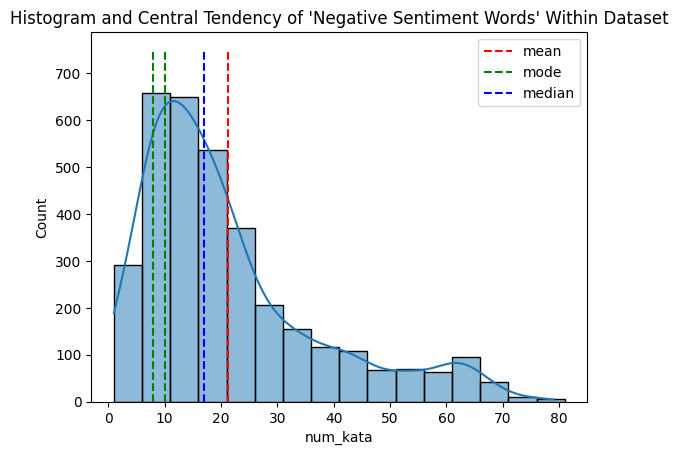

In [19]:
# Memplot histogram jumlah kata pada teks
sns.histplot(data=df_negative, x='num_kata', binwidth=5, kde=True)
plt.vlines(df_negative['num_kata'].mean(), 0, 750, label='mean', linestyle='dashed', color='red')
plt.vlines(df_negative['num_kata'].mode(), 0, 750, label='mode', linestyle='dashed', color='green')
plt.vlines(df_negative['num_kata'].median(), 0, 750, label='median', linestyle='dashed', color='blue')
plt.title("Histogram and Central Tendency of 'Negative Sentiment Words' Within Dataset")
plt.legend()
plt.show()

### Neutral Sentiment

In [20]:
df_neutral = df.loc[df['sentiment'] == 'neutral']
df_neutral

,kalimat,sentiment,clean text,clean abusive,clean alay,clean abusive alay,num_kata
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,18
16,setiap bumn dibentuk dengan uu bukan dibentuk ...,neutral,setiap bumn dibentuk dengan uu bukan dibentuk ...,setiap bumn dibentuk dengan uu bukan dibentuk ...,setiap badan usaha milik negara dibentuk denga...,setiap badan usaha milik negara dibentuk denga...,9
28,pdip sebut ridwan kamil menang karena berbaju ...,neutral,pdip sebut ridwan kamil menang karena berbaju ...,pdip sebut ridwan kamil menang karena berbaju ...,partai demokrasi indonesia perjuangan sebut ri...,partai demokrasi indonesia perjuangan sebut ri...,8
32,08:30 : kedatangan presiden ri dan rombongan d...,neutral,08 30 kedatangan presiden ri dan rombongan di ...,08 30 kedatangan presiden ri dan rombongan di ...,08 30 kedatangan presiden ri dan rombongan di ...,08 30 kedatangan presiden ri dan rombongan di ...,31
37,risma menjatuhkan pilihan nya pada gus ipul - ...,neutral,risma menjatuhkan pilihan nya pada gus ipul pu...,risma menjatuhkan pilihan nya pada gus ipul pu...,risma menjatuhkan pilihan nya pada gus ipul pu...,risma menjatuhkan pilihan nya pada gus ipul pu...,13
...,...,...,...,...,...,...,...
10925,pkb benarkan charly setia band daftar jadi caw...,neutral,pkb benarkan charly setia band daftar jadi caw...,pkb benarkan charly setia band daftar jadi caw...,partai kebangkitan bangsa benarkan charly seti...,partai kebangkitan bangsa benarkan charly seti...,10
10967,pernah percaya kalau body lotion citra bikin b...,neutral,pernah percaya kalau body lotion citra bikin b...,pernah percaya kalau body lotion citra bikin b...,pernah percaya kalau body lotion citra bikin b...,pernah percaya kalau body lotion citra bikin b...,10
10969,"bu susi marah , menteri luhut perbolehkan kapa...",neutral,bu susi marah menteri luhut perbolehkan kapal ...,bu susi marah menteri luhut perbolehkan kapal ...,bu susi marah menteri luhut perbolehkan kapal ...,bu susi marah menteri luhut perbolehkan kapal ...,15
10993,f - demokrat dorong upaya kemandirian energi n...,neutral,f demokrat dorong upaya kemandirian energi nas...,f demokrat dorong upaya kemandirian energi nas...,f demokrat dorong upaya kemandirian energi nas...,f demokrat dorong upaya kemandirian energi nas...,7


In [21]:
total_kata = df_neutral['num_kata'].sum()
print(f"Total jumlah kata dari dataset dengans sentimen netral sebanyak: {total_kata:,} kata")

Total jumlah kata dari dataset dengans sentimen netral sebanyak: 15,363 kata


In [22]:
# rata-rata jumlah kata dalam teks di dataset
avg_num_kata = df_neutral['num_kata'].mean()
print(f"Rata-rata jumlah kata dalam kata di dataset: {avg_num_kata:.3f} kata")

Rata-rata jumlah kata dalam kata di dataset: 13.382 kata


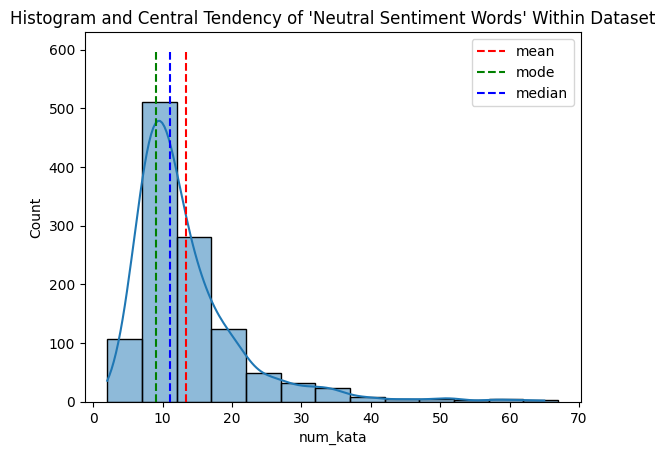

In [23]:
# Memplot histogram jumlah kata pada teks
sns.histplot(data=df_neutral, x='num_kata', binwidth=5, kde=True)
plt.vlines(df_neutral['num_kata'].mean(), 0, 600, label='mean', linestyle='dashed', color='red')
plt.vlines(df_neutral['num_kata'].mode(), 0, 600, label='mode', linestyle='dashed', color='green')
plt.vlines(df_neutral['num_kata'].median(), 0, 600, label='median', linestyle='dashed', color='blue')
plt.title("Histogram and Central Tendency of 'Neutral Sentiment Words' Within Dataset")
plt.legend()
plt.show()

## Common Words

In [32]:
# Import stopword bahasa Indonesia
stopword_id = pd.read_csv("csv_data/stopword.csv")
stwordid = stopword_id['kata'].to_list()

### For All Sentiment

In [35]:
df['temp_list'] = df['clean text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist if item not in stwordid])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,enak,3721
1,makanan,3587
2,makan,2844
3,harga,1989
4,menu,1749
5,bandung,1723
6,banget,1499
7,restoran,1300
8,suasana,988
9,malam,937


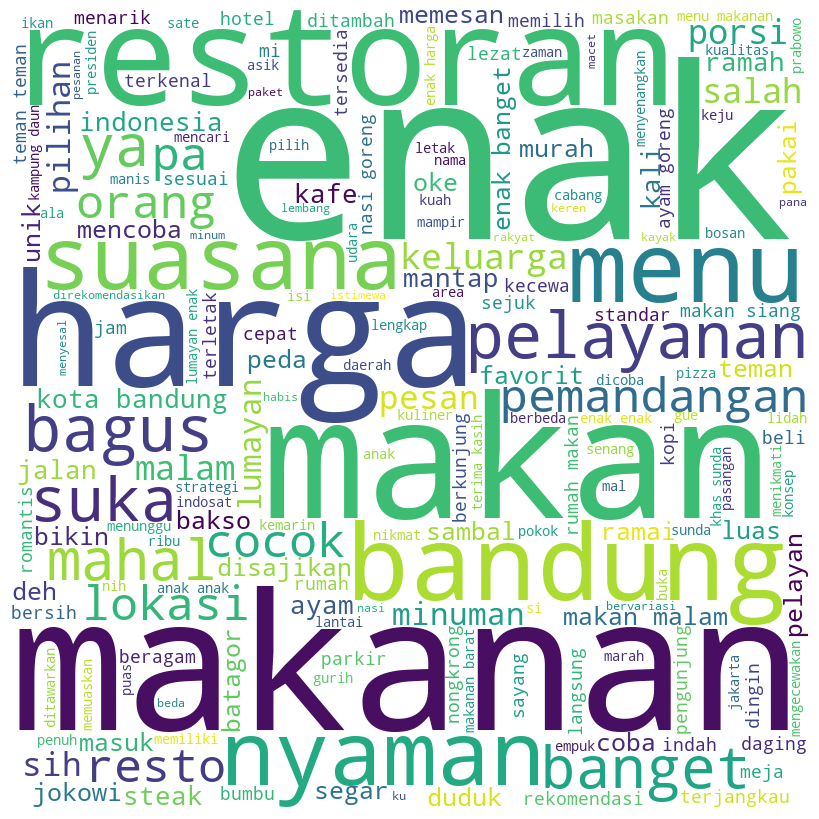

In [36]:
comment_words = ''
stopwords = set(stwordid)
 
# iterate through the csv file
for val in df['clean text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Positive Sentiment

In [33]:
df_positive['temp_list'] = df_positive['clean text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_positive['temp_list'] for item in sublist if item not in stwordid])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

C:\Users\Irin\AppData\Local\Temp\ipykernel_9812\3496578663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['temp_list'] = df_positive['clean text'].apply(lambda x:str(x).split())


,Common_words,count
0,enak,3459
1,makanan,3188
2,makan,2523
3,harga,1701
4,bandung,1613
5,menu,1600
6,banget,1183
7,restoran,1165
8,suasana,934
9,nyaman,851


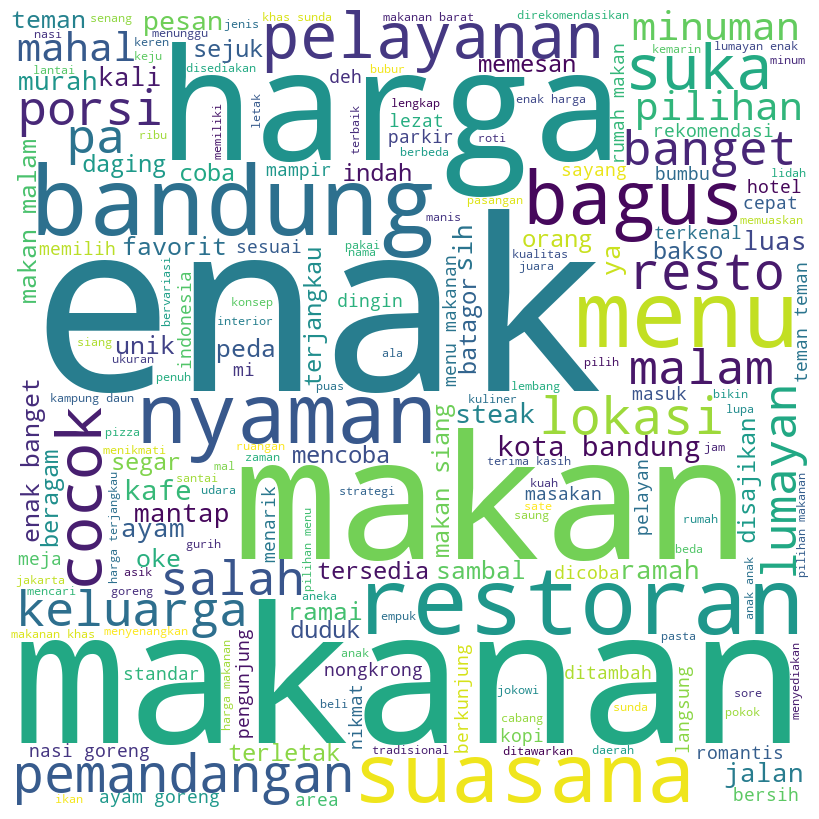

In [34]:
comment_words = ''
stopwords = set(stwordid)
 
# iterate through the csv file
for val in df_positive['clean text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Negative Sentiment

In [7]:
# negative sentiment dataset
df_negative = df.loc[df['sentiment'] == 'negative']
df_negative

,kalimat,sentiment,clean text,clean abusive,clean alay,clean abusive alay
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...,duh jadi mahasiswa jangan sombong dong kasih k...,aduh jadi mahasiswa jangan sombong dong kasih ...,aduh jadi mahasiswa jangan sombong dong kasih ...
6,pakai kartu kredit bca tidak untung malah rugi...,negative,pakai kartu kredit bca tidak untung malah rugi...,pakai kartu kredit bca tidak untung malah rugi...,pakai kartu kredit baca tidak untung malah rug...,pakai kartu kredit baca tidak untung malah rug...
10,simcard indosat inaktiv gara-gara lupa isi pul...,negative,simcard indosat inaktiv gara gara lupa isi pul...,simcard indosat inaktiv gara gara lupa isi pul...,simcard indosat inaktiv gara gara lupa isi pul...,simcard indosat inaktiv gara gara lupa isi pul...
11,sifat iri sering muncul pada orang orang yang ...,negative,sifat iri sering muncul pada orang orang yang ...,sifat iri sering muncul pada orang orang yang ...,sifat iri sering muncul pada orang orang yang ...,sifat iri sering muncul pada orang orang yang ...
13,"pengalaman bersama indosat hari ini , semoga t...",negative,pengalaman bersama indosat hari ini semoga tid...,pengalaman bersama indosat hari ini semoga tid...,pengalaman bersama indosat hari ini semoga tid...,pengalaman bersama indosat hari ini semoga tid...
...,...,...,...,...,...,...
10982,tolong dibaca pesan saya ! di dalam kotak hand...,negative,tolong dibaca pesan saya di dalam kotak handph...,tolong dibaca pesan saya di dalam kotak handph...,tolong dibaca pesan saya di dalam kotak handph...,tolong dibaca pesan saya di dalam kotak handph...
10985,"sumpah gue kecewa banget dengan sms , cuma tea...",negative,sumpah gue kecewa banget dengan sms cuma tease...,sumpah gue kecewa banget dengan sms cuma tease...,sumpah gue kecewa banget dengan sms cuma tease...,sumpah gue kecewa banget dengan sms cuma tease...
10989,tadinya pengin mengantar teman dari kalau ke r...,negative,tadinya pengin mengantar teman dari kalau ke r...,tadinya pengin mengantar teman dari kalau ke r...,tadinya ingin mengantar teman dari kalau ke re...,tadinya ingin mengantar teman dari kalau ke re...
10991,dapat rom awal abad,negative,dapat rom awal abad,dapat rom awal abad,dapat rom awal abad,dapat rom awal abad


In [38]:
df_negative['temp_list'] = df_negative['clean text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_negative['temp_list'] for item in sublist if item not in stwordid])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

C:\Users\Irin\AppData\Local\Temp\ipykernel_9812\160237753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['temp_list'] = df_negative['clean text'].apply(lambda x:str(x).split())


,Common_words,count
0,orang,483
1,makanan,388
2,banget,314
3,ya,303
4,makan,299
5,harga,269
6,enak,258
7,mahal,251
8,sih,211
9,pelayanan,202


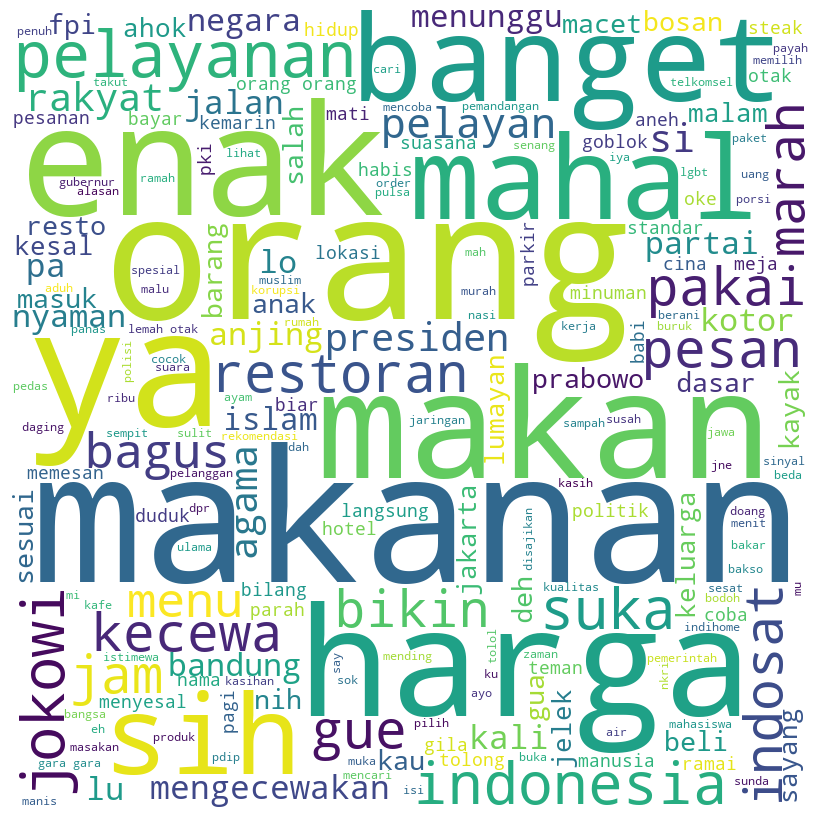

In [39]:
comment_words = ''
stopwords = set(stwordid)
 
# iterate through the csv file
for val in df_negative['clean text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Neutral Sentiment

In [40]:
# neutral sentiment dataset
df_neutral = df.loc[df['sentiment'] == 'neutral']
df_neutral

,kalimat,sentiment,clean text,clean abusive,clean alay,clean abusive alay,num_kata,temp_list
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 mmbri hujjah partai...,18,"[mohon, ulama, lurus, dan, k212, mmbri, hujjah..."
16,setiap bumn dibentuk dengan uu bukan dibentuk ...,neutral,setiap bumn dibentuk dengan uu bukan dibentuk ...,setiap bumn dibentuk dengan uu bukan dibentuk ...,setiap badan usaha milik negara dibentuk denga...,setiap badan usaha milik negara dibentuk denga...,9,"[setiap, bumn, dibentuk, dengan, uu, bukan, di..."
28,pdip sebut ridwan kamil menang karena berbaju ...,neutral,pdip sebut ridwan kamil menang karena berbaju ...,pdip sebut ridwan kamil menang karena berbaju ...,partai demokrasi indonesia perjuangan sebut ri...,partai demokrasi indonesia perjuangan sebut ri...,8,"[pdip, sebut, ridwan, kamil, menang, karena, b..."
32,08:30 : kedatangan presiden ri dan rombongan d...,neutral,08 30 kedatangan presiden ri dan rombongan di ...,08 30 kedatangan presiden ri dan rombongan di ...,08 30 kedatangan presiden ri dan rombongan di ...,08 30 kedatangan presiden ri dan rombongan di ...,31,"[08, 30, kedatangan, presiden, ri, dan, rombon..."
37,risma menjatuhkan pilihan nya pada gus ipul - ...,neutral,risma menjatuhkan pilihan nya pada gus ipul pu...,risma menjatuhkan pilihan nya pada gus ipul pu...,risma menjatuhkan pilihan nya pada gus ipul pu...,risma menjatuhkan pilihan nya pada gus ipul pu...,13,"[risma, menjatuhkan, pilihan, nya, pada, gus, ..."
...,...,...,...,...,...,...,...,...
10925,pkb benarkan charly setia band daftar jadi caw...,neutral,pkb benarkan charly setia band daftar jadi caw...,pkb benarkan charly setia band daftar jadi caw...,partai kebangkitan bangsa benarkan charly seti...,partai kebangkitan bangsa benarkan charly seti...,10,"[pkb, benarkan, charly, setia, band, daftar, j..."
10967,pernah percaya kalau body lotion citra bikin b...,neutral,pernah percaya kalau body lotion citra bikin b...,pernah percaya kalau body lotion citra bikin b...,pernah percaya kalau body lotion citra bikin b...,pernah percaya kalau body lotion citra bikin b...,10,"[pernah, percaya, kalau, body, lotion, citra, ..."
10969,"bu susi marah , menteri luhut perbolehkan kapa...",neutral,bu susi marah menteri luhut perbolehkan kapal ...,bu susi marah menteri luhut perbolehkan kapal ...,bu susi marah menteri luhut perbolehkan kapal ...,bu susi marah menteri luhut perbolehkan kapal ...,15,"[bu, susi, marah, menteri, luhut, perbolehkan,..."
10993,f - demokrat dorong upaya kemandirian energi n...,neutral,f demokrat dorong upaya kemandirian energi nas...,f demokrat dorong upaya kemandirian energi nas...,f demokrat dorong upaya kemandirian energi nas...,f demokrat dorong upaya kemandirian energi nas...,7,"[f, demokrat, dorong, upaya, kemandirian, ener..."


In [41]:
df_neutral['temp_list'] = df_neutral['clean text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_neutral['temp_list'] for item in sublist if item not in stwordid])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

C:\Users\Irin\AppData\Local\Temp\ipykernel_9812\252621575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neutral['temp_list'] = df_neutral['clean text'].apply(lambda x:str(x).split())


,Common_words,count
0,demokrat,96
1,2018,70
2,pilkada,57
3,partai,49
4,anies,46
5,jakarta,43
6,indonesia,42
7,ya,41
8,pdip,40
9,ridwan,39


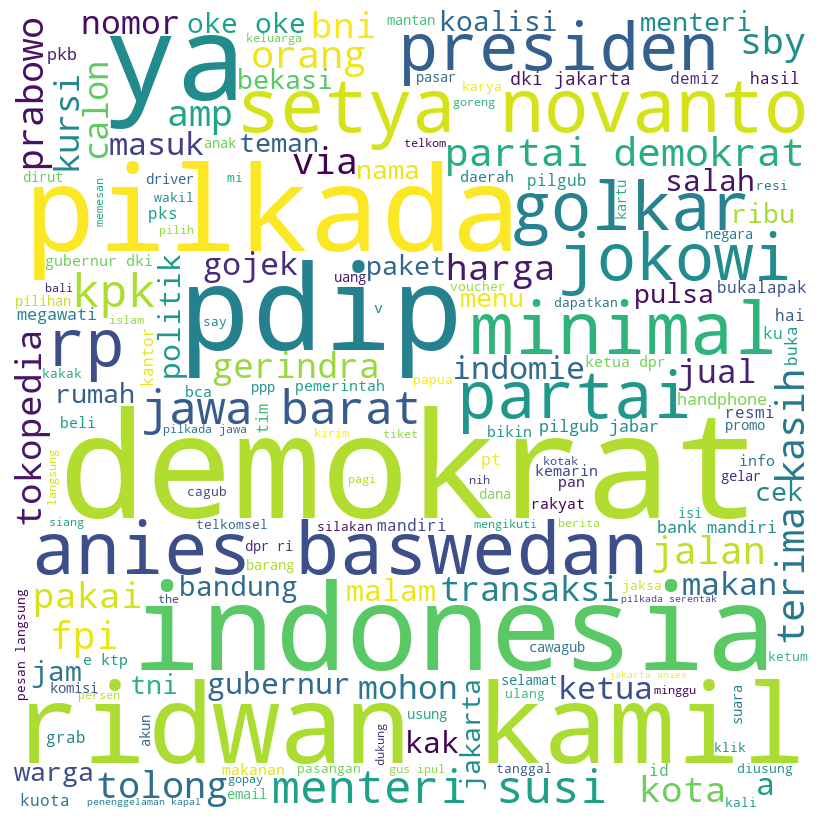

In [42]:
comment_words = ''
stopwords = set(stwordid)
 
# iterate through the csv file
for val in df_neutral['clean text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

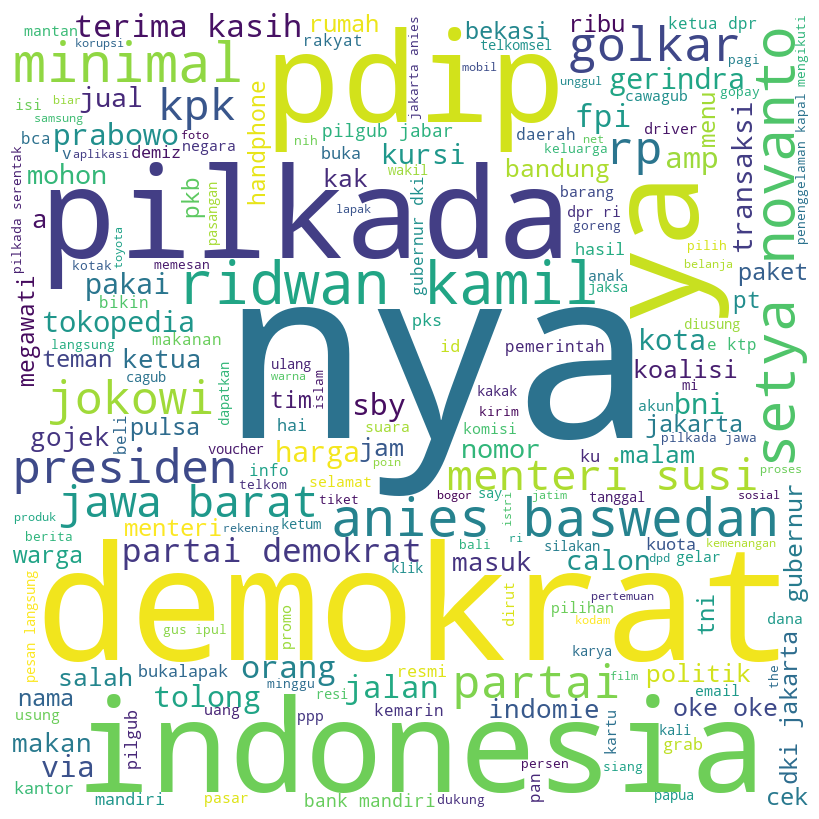

In [67]:
comment_words = ''
stopwords = set(stwordid)
 
# iterate through the csv file
for val in df_neutral['clean text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Neural Network Result Analysis

In [45]:
# Laod feature extraction result
count_vect = pickle.load(open("feature.p", 'rb'))

In [46]:
# Load model result
with open("model.p", "rb") as f:
    lr = pickle.load(f)

In [51]:
# Transform text data
data_preprocessed = df['clean text'].tolist()
X = count_vect.transform(data_preprocessed)
classes = df['sentiment']

In [62]:
# Split data into test and training data
from sklearn.model_selection import train_test_split

# Split dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

In [63]:
# First prediction using saved model
from sklearn.metrics import classification_report

test = lr.predict(X_test)

print("Testing selesai")

print(classification_report(y_test, test))

Testing selesai
              precision    recall  f1-score   support

    negative       0.96      0.97      0.96       687
     neutral       0.96      0.94      0.95       212
    positive       0.98      0.98      0.98      1301

    accuracy                           0.97      2200
   macro avg       0.97      0.96      0.97      2200
weighted avg       0.97      0.97      0.97      2200



In [65]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, test)
conf_mat

array([[ 666,    2,   19],
       [   7,  200,    5],
       [  21,    6, 1274]], dtype=int64)

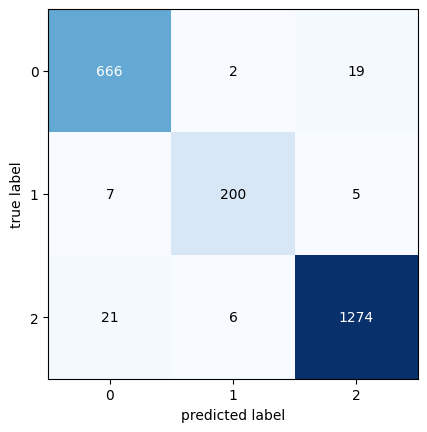

In [66]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat)

plt.show()

In [67]:
# Actual result
y_test.value_counts()

sentiment
positive    1301
negative     687
neutral      212
Name: count, dtype: int64

In [70]:
# Predicted result
unique, counts = np.unique(test, return_counts=True)

print(np.asarray((unique, counts)).T)

[['negative' '694']
 ['neutral' '208']
 ['positive' '1298']]
